### Decision Tree Model

Looking at plots of the data in Excel, it looks like the classes have clear separation. Let's start with a Decision Tree Classifier model and see how that does.

In [1]:
# Import libraries we will be using

import sys
import numpy as np
import pandas as pd

import sklearn as skl
import sklearn.metrics as skl_met
import sklearn.model_selection as skl_modsel
import sklearn.preprocessing as skl_pre
import sklearn.tree as skl_tree
import sklearn.pipeline as skl_pipeline

import pickle

In [2]:
# Always a good idea to dump verions of key libraries
print('python version:    ', sys.version)
print('numpy version:     ', np.__version__)
print('pandas version:    ', pd.__version__)
print('sklearn version:   ', skl.__version__)


python version:     3.7.7 (default, Mar 23 2020, 23:19:08) [MSC v.1916 64 bit (AMD64)]
numpy version:      1.18.1
pandas version:     1.0.3
sklearn version:    0.22.1


In [3]:
# I read it is a good idea to seed the Numpy random number generator
#   so that we get the same 'random' numbers each run for reproducibility. 
np.random.seed(123)


In [4]:
# Loaad the dataset
dataset  = pd.read_csv('./ML_20.csv', header=None, names=['status', 'vibration'])


In [5]:
# Dump some general stats
print('Number of records: {}\n'.format(dataset.size))

# Dump a few records from each 'section'; there should be 999 record with status=0,
#  followed by 999 records with status=2, and 999 records with status=1
print(dataset[0:5], '\n')
print(dataset[1000:1005], '\n')
print(dataset[2000:2005], '\n')

# For a categorical values, print count and % of each class
counts = dataset['status'].value_counts().sort_index()
print('Class   Count   % of Total')
for idx, val in counts.items():
    print('  {0}    {1:6d}    {2:6.2f}%'.format(idx, val, ((val / dataset.shape[0]) * 100)))


Number of records: 5994

   status  vibration
0       0   0.078453
1       0   0.078453
2       0   0.098067
3       0   0.094144
4       0   0.084991 

      status  vibration
1000       2   0.575323
1001       2   0.578592
1002       2   0.611935
1003       2   0.594937
1004       2   0.537965 

      status  vibration
2000       1   0.264780
2001       1   0.274586
2002       1   0.268048
2003       1   0.263379
2004       1   0.250070 

Class   Count   % of Total
  0       999     33.33%
  1       999     33.33%
  2       999     33.33%


In [6]:
# Split off the the features and target (note we only have 1 feature)
# Since we constructed the data to have status values 0-2, we can just
#  use those values as the class labels without any further fuddling (e.g. label encoding)
X = dataset.loc[:, 'vibration']
y_class = dataset.loc[:, 'status']

# Since we only have 1 feature, the above will generate a 1-dim array; we need
#  a 2-dim array with only 1 column; so need to add an extra dimension, the columns
X = np.expand_dims(X, 1)


In [7]:
# Split into training and test
X_train, X_test, y_train_class, y_test_class = skl_modsel.train_test_split(X, y_class, test_size=0.2, 
                                                                           random_state=0, stratify=y_class)

print("X.shape             =", X.shape)
print("X_train.shape       =", X_train.shape)
print("X_test.shape        =", X_test.shape)
print("y_train_class.shape =", y_train_class.shape)
print("y_test_class.shape  =", y_test_class.shape)

print('\n')
print('Target class counts - train:')
cname, count = np.unique(y_train_class, return_counts=True)
for ele in zip(cname, count):
    print('    Class: {}  Count: {}'.format(ele[0], ele[1]))

print('\n')
print('Target class distribution - test:')
cname, count = np.unique(y_test_class, return_counts=True)
for ele in zip(cname, count):
    print('    Class: {}  Count: {}'.format(ele[0], ele[1]))


X.shape             = (2997, 1)
X_train.shape       = (2397, 1)
X_test.shape        = (600, 1)
y_train_class.shape = (2397,)
y_test_class.shape  = (600,)


Target class counts - train:
    Class: 0  Count: 799
    Class: 1  Count: 799
    Class: 2  Count: 799


Target class distribution - test:
    Class: 0  Count: 200
    Class: 1  Count: 200
    Class: 2  Count: 200


In [8]:
# let's use the standard scaler to normalize feature values
sc_X = skl_pre.StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


In [9]:
# At long last, we can create a model
tree_model = skl_tree.DecisionTreeClassifier()    # kernel='linear')
tree_model.fit(X_train, y_train_class)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [10]:
# Using the test set, let's see how well our model does
yhat_test_class = tree_model.predict(X_test)

print('Confusion Matrix - Test:\n', skl_met.confusion_matrix(y_test_class, yhat_test_class))
print('\n')
print('Precision - Test:', skl_met.precision_score(y_test_class, yhat_test_class, average=None))
print('Recall - Test   :', skl_met.recall_score(y_test_class, yhat_test_class, average=None))
print('F1 - Test       :', skl_met.f1_score(y_test_class, yhat_test_class, average=None))


Confusion Matrix - Test:
 [[200   0   0]
 [  0 200   0]
 [  0   0 200]]


Precision - Test: [1. 1. 1.]
Recall - Test   : [1. 1. 1.]
F1 - Test       : [1. 1. 1.]


In [11]:
# Let's also see how the model did on the training set
yhat_train_class = tree_model.predict(X_train)

print('Confusion Matrix - Train:\n', skl_met.confusion_matrix(y_train_class, yhat_train_class))
print('\n')
print('Precision - Train:', skl_met.precision_score(y_train_class, yhat_train_class, average=None))
print('Recall - Train   :', skl_met.recall_score(y_train_class, yhat_train_class, average=None))
print('F1 - Train       :', skl_met.f1_score(y_train_class, yhat_train_class, average=None))


Confusion Matrix - Train:
 [[799   0   0]
 [  0 799   0]
 [  0   0 799]]


Precision - Train: [1. 1. 1.]
Recall - Train   : [1. 1. 1.]
F1 - Train       : [1. 1. 1.]


In [12]:
# Let's package the data standardization and decision tree into a pipeline
pipeline = skl_pipeline.make_pipeline(sc_X, tree_model)


In [13]:
# Let's test the pipeline with some randomly selected values from the 
#   original data file; this should predict classes 0, 2, 1
X_pipeline_test = [[0.074531], [0.847295], [0.194172], [0.203978], [0.074531], [0.786493]]
y_pipeline_test_class = [0, 2, 1, 1, 0, 2]

yhat_pipeline_test_class = pipeline.predict(X_pipeline_test)

print('Confusion Matrix - Pipeline Test:\n', skl_met.confusion_matrix(y_pipeline_test_class, yhat_pipeline_test_class))

Confusion Matrix - Pipeline Test:
 [[2 0 0]
 [0 2 0]
 [0 0 2]]


In [14]:
# Save the model off
pickle.dump(pipeline, open('tree_pipeline.pkl', 'wb'))

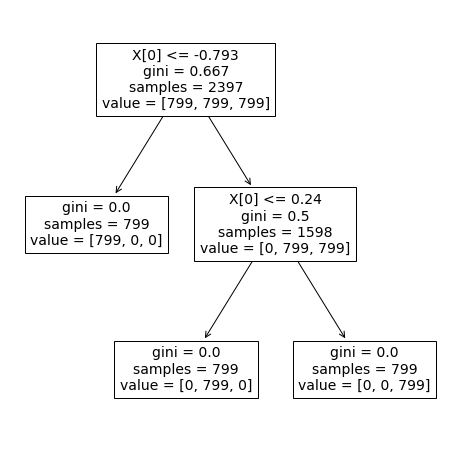

In [15]:
# Plot the decision tree; note this code will NOT work on the Pi; comment out

#from sklearn import tree
#import matplotlib.pyplot as plt
#%matplotlib inline
#
#plt.figure(figsize = [8,8])
#tree.plot_tree(tree_model)
#plt.show()